In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn import metrics 
from plotly import graph_objects as go
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_6260\1128211724.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('day.csv', sep=',')

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# df.dropna(inplace=True)

In [5]:
'''
- instant: индекс записи
 - dteday : дата
 - season : сезон (1:весна, 2:лето, 3:осень, 4:зима)
 - yr : год (0: 2011, 1:2012)
 - mnth : месяц (от 1 до 12)
 - hr: час (от 0 до 23)
 - holiday	: выходной день или нет (извлечено из http://dchr.dc.gov/page/holiday-schedule)
 - weekday: день недели
- workingday	: если день не является ни выходным, ни праздничным, равно 1, в противном случае равно 0.
weathersit	 : 
 - 1: Ясно, малооблачно, Переменная облачность, Переменная облачность без осадков
 - 2: Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман
 - 3: Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + Рассеянные облака
 - 4: Сильный дождь + Ледяные поддоны + Гроза + Туман, Снег + Туман
 - temp: Нормализованная температура в градусах Цельсия. Значения разделены на 41 (максимум)
 - atemp: Нормализованная температура на ощупь в градусах Цельсия. Значения разделены на 50 (макс.)
 - hum: Нормализованная влажность. Значения разделены на 100 макс.)
 - windspeed: Нормализованная скорость ветра. Значения делятся на 67 (максимум)
 - casual: количество случайных пользователей
 - registered: количество зарегистрированных пользователей
 - cnt: общее количество арендованных велосипедов, включая как случайные, так и зарегистрированные
'''

'\n- instant: индекс записи\n - dteday : дата\n - season : сезон (1:весна, 2:лето, 3:осень, 4:зима)\n - yr : год (0: 2011, 1:2012)\n - mnth : месяц (от 1 до 12)\n - hr: час (от 0 до 23)\n - holiday\t: выходной день или нет (извлечено из http://dchr.dc.gov/page/holiday-schedule)\n - weekday: день недели\n- workingday\t: если день не является ни выходным, ни праздничным, равно 1, в противном случае равно 0.\nweathersit\t : \n - 1: Ясно, малооблачно, Переменная облачность, Переменная облачность без осадков\n - 2: Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман\n - 3: Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + Рассеянные облака\n - 4: Сильный дождь + Ледяные поддоны + Гроза + Туман, Снег + Туман\n - temp: Нормализованная температура в градусах Цельсия. Значения разделены на 41 (максимум)\n - atemp: Нормализованная температура на ощупь в градусах Цельсия. Значения разделены на 50 (макс.)\n - hum: Нормализованная влажность. Зн

In [6]:
data = df.drop('dteday', axis=1)

In [7]:
data  = data.drop('instant',axis=1)

In [9]:
df['dteday'].min()

'2011-01-01'

In [8]:
# корреляционный анализ

Text(0.5, 1.0, 'матрица корреляции')

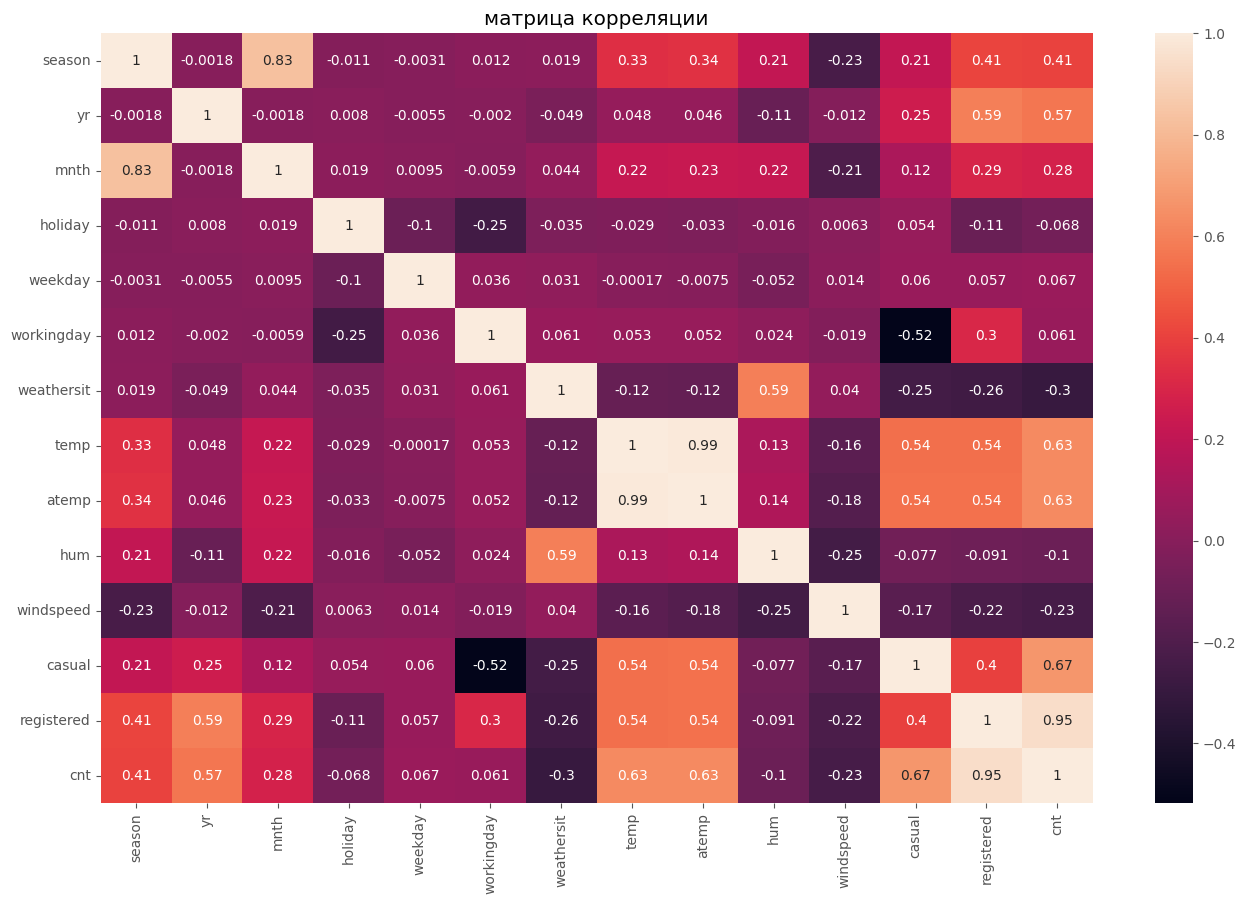

In [9]:
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data.corr(), annot=True) 
heatmap.set_title('матрица корреляции')# коэффициенты линейной корреляции могут принимать значения от -1 до +1 
# (-1 сильная обратная линейная зависимость, +1 сильная прямая линейная зависимость, 
# значения возле 0 - отсутствие линейной зависимости, нелинейная зависимость может быть при этом!)

На переменную cnt (общее количество арендованных велосипедов), которую мы будем прогнозировать больше всего влияют сезон, год, нормализованная температура в градусах Цельсия, Нормализованная температура на ощупь в градусах Цельсия. Также она имеет сильную корреляцию с числом случайных пользователей и числом зарегистированных пользователей, что логично, так как cnt = casual + registered. Можем убрать из модели эти переменные (casual и registered). Среди регрессоров сильную корреляцию имеют месяц и сезон, один из этих факторов нужно удалить, чтобы модель была более точной. Удалим месяц, так как сезон сильнее влияет на общее количество арендованных велосипедов. Умеренную прямую зависимость имеют погода и влажность, а обратную умеренную будний день и число случайных пользователей. То есть случайные пользователи реже арендуют велосипеды в будний день, чем зарегистрированные. Также имеется очень сильная прямая связь между нормализованной температурой на ощупь в градусах Цельсия и нормализованной температура в градусах Цельсия, что логично, так как одна температура зависит от другой. Удалим один из этих регрессоров. Удалим нормализованную температуру в градусах Цельсия. Оставим регрессоры нормализованная скорость ветра и погода, так как они имеют обратную зависимость с общим количество арендованных велосипедов. То есть чем хуже погода, тем реже люди арендуют велосипеды. Также чем сильнее ветер, тем реже люди арендуют велосипеды

In [10]:
data['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [11]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [12]:
df['yr'].value_counts()

yr
1    366
0    365
Name: count, dtype: int64

In [13]:
df['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [14]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [15]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

Поскольку данные представлены за каждую дату за 2 года, количество строк одинаковое по сезонам, годам,неделям. Будних дней намного больше, чем выходных. Чаще всего было ясно ( в 2 раза чаще, чем туманно или облачно), очень редко был небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + Рассеянные облака. Вообще не было плохой погоды (Сильный дождь + Ледяные поддоны + Гроза + Туман, Снег + Туман)

In [16]:
week = data.groupby('weekday').agg({'cnt':['sum']})
week

,cnt
,sum
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [17]:
yr = data.groupby('yr').agg({'cnt':['sum']})
yr

,cnt
,sum
yr,
0,1243103
1,2049576


In [18]:
season = data.groupby('season').agg({'cnt':['sum']})
season

,cnt
,sum
season,
1,471348
2,918589
3,1061129
4,841613


In [19]:
holiday = data.groupby('holiday').agg({'cnt':['sum']})
holiday

,cnt
,sum
holiday,
0,3214244
1,78435


In [20]:
weathersit = data.groupby('weathersit').agg({'cnt':['sum']})
weathersit

,cnt
,sum
weathersit,
1,2257952
2,996858
3,37869


По дням недели число арендованных велосипедов примерно одинаковое. В 2012 году их число выросло примерно в 2 раза, что говорит о росте рынка аренды велосипедов. Чаще всего велосипеды арендуют осенью и летом, реже всего - весной. Намного чаще велосипеды арендуют в ясную погоду (в 2 раза чаще, чем в Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман)

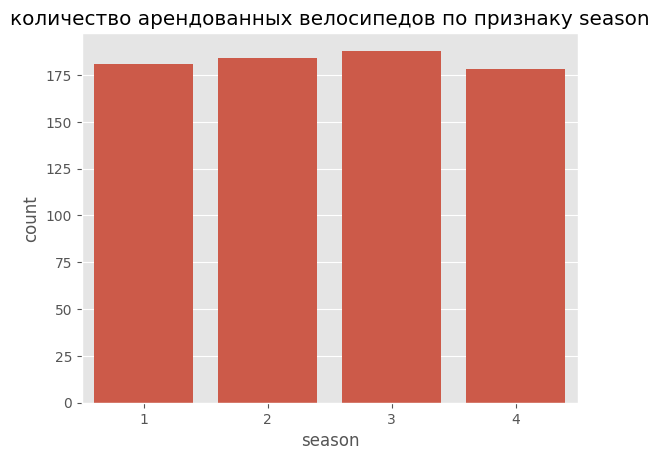

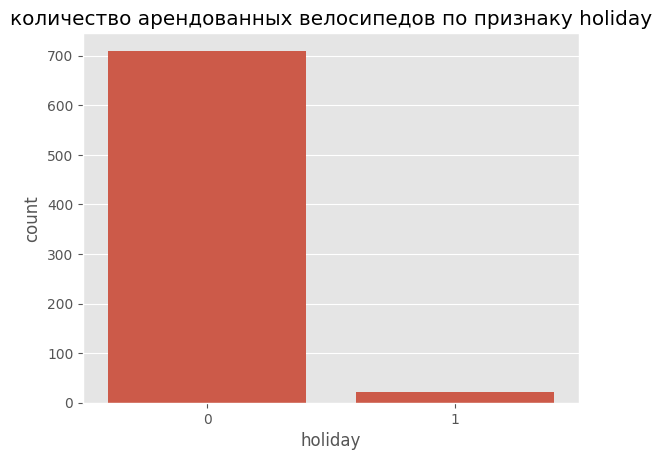

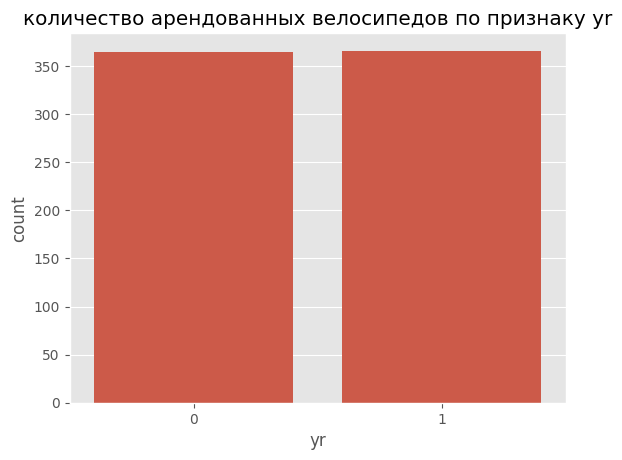

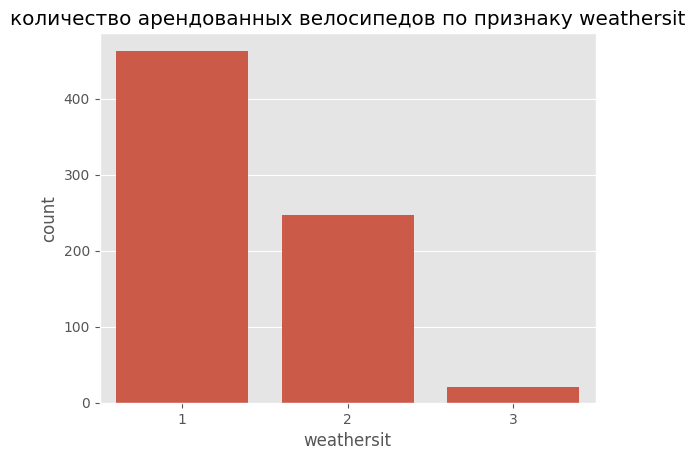

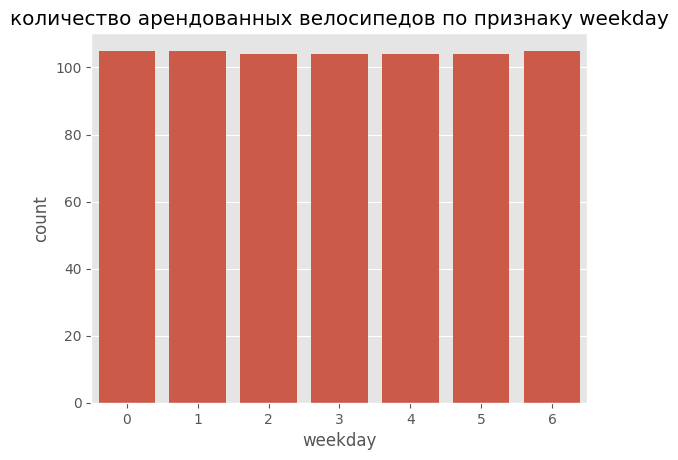

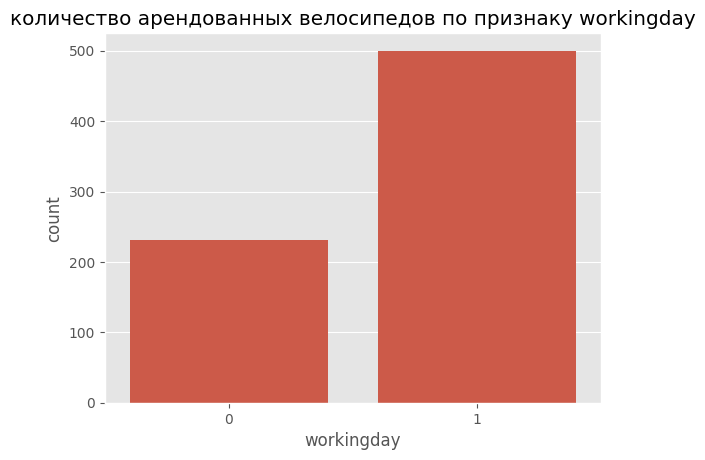

In [21]:
cols = ['season','holiday','yr','weathersit','weekday','workingday']
for i in cols:
    ax = sns.countplot(data=data, x=i);
    plt.title(f'количество арендованных велосипедов по признаку {i}')
    #plt.legend(['оставшиеся', 'ушедшие'])
    plt.show()  

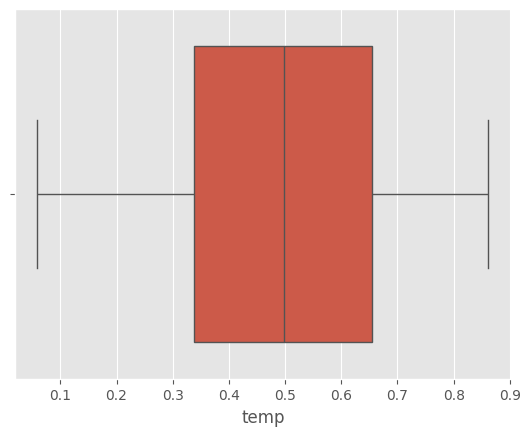

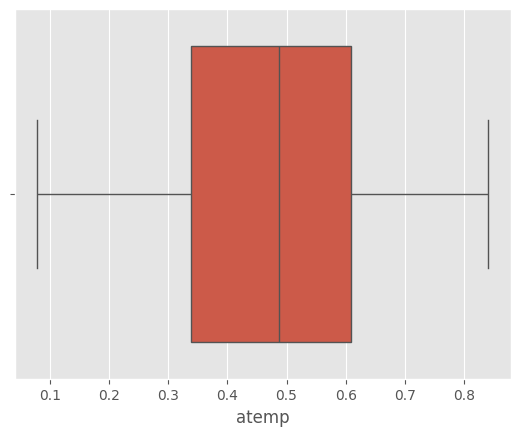

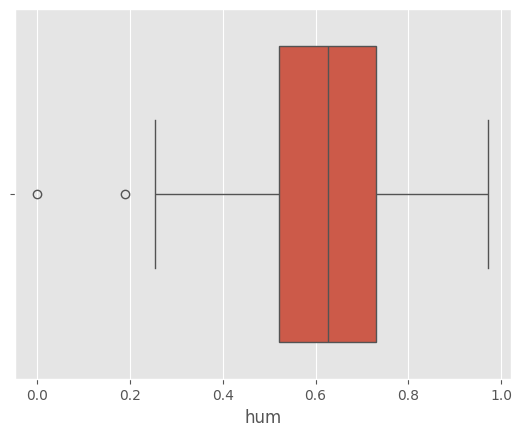

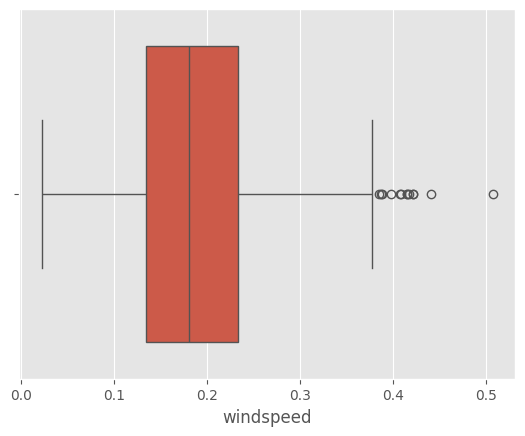

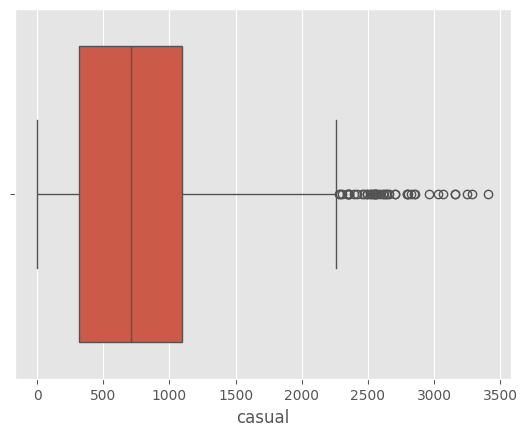

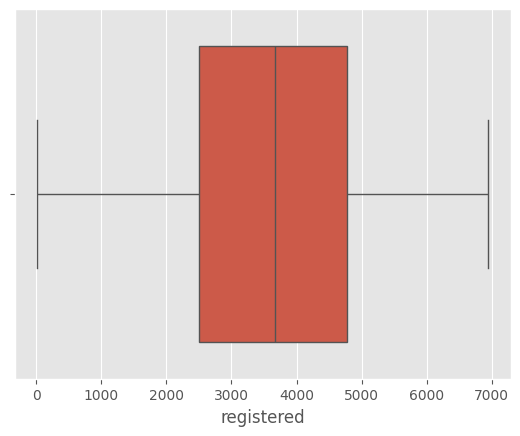

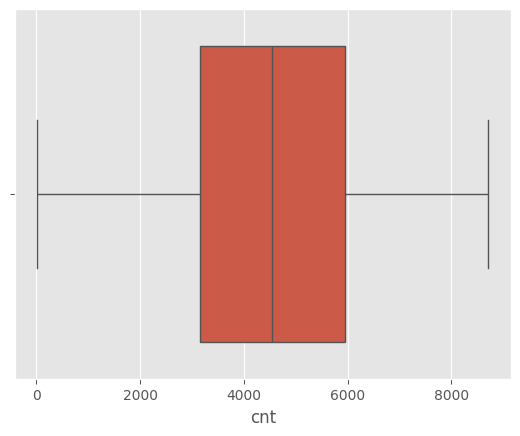

In [22]:
cols = ['temp'	,'atemp'	,'hum',	'windspeed',	'casual',	'registered',	'cnt']
for i in cols:
    plt.figure()
    sns.boxplot(x=i, data=data)
    plt.show()

В основном погода была жаркая, почти не ветреная, влажность в основном от 0,5 до 0,7. Среди случайных пользователей много выбросов, но в основном их намного меньше, чем зарегистрированных (от 250 до 1200)

<Axes: xlabel='dteday'>

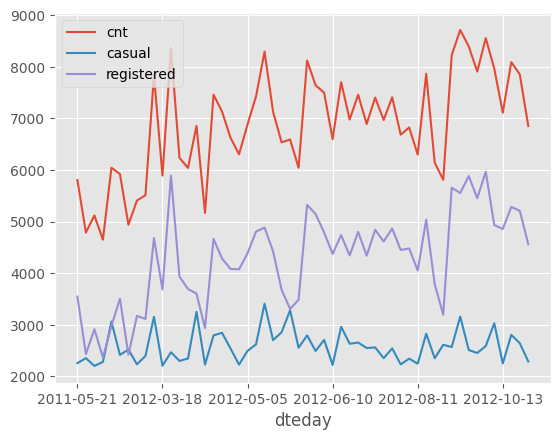

In [23]:
df.query('casual >= 2200').plot(x='dteday',y=['cnt','casual','registered'], grid=True)

In [24]:
data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
data.duplicated().sum()

0

Дубликатов и пропусков нет. В марте 2012 виден всплеск аренды велосипедов зарегистрированными и случайными пользователями. Снижается аренда велосипедов зарегистрированными пользователями в мае и августе, но повышается среди случайных

Итак, для построения регрессии используем прогнозируемую переменную cnt и регрессоры нормализованная скорость ветра, погода, нормализованная температура на ощупь в градусах Цельсия, сезон и год

In [26]:
# линейная регрессия 

In [27]:
# создание обучающей и тестовой выборок из исходной

In [28]:
from sklearn.utils import shuffle
df = df[['season','yr','weathersit','atemp','windspeed','cnt']]
df = shuffle(df) # перемешать датасет случайным образом (теперь индексы идут не по порядку)

In [29]:
# подготовка данных и нахождение коэффициентов линейной регрессии

In [30]:
y = df[['cnt']]

In [31]:
X = df.drop(['cnt'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df

[[  396.06664346  2092.92160698  -705.76808892  5680.45505083
  -1385.42048642]]


,index,0,1,2,3,4
0,0,396.066643,2092.921607,-705.768089,5680.455051,-1385.420486


In [35]:
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')

season: 396.06664345712153
yr: 2092.9216069779513
weathersit: -705.76808892093
atemp: 5680.455050827803
windspeed: -1385.420486422503


In [36]:
y_pred = regressor.predict(X_test)

In [37]:
df_2 = pd.DataFrame(y_pred) 
df_2

,0
0,2992.869075
1,5783.475974
2,3550.225556
3,2744.910286
4,4328.887087
...,...
215,7630.156633
216,5320.323570
217,4059.172285
218,4958.869178


In [38]:
result = pd.concat([y_test.reset_index(), df_2], axis=1, join='outer')

In [39]:
result.columns =['index','фактическое','предсказанное' ]

In [40]:
r_squared = regressor.score (X, y)
print(r_squared)

0.7826555050630255


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = metrics.mean_absolute_error(y_test, y_pred) / y_test.abs().sum()
print('Средняя ошибка аппроксимации', mape*100)

Mean Absolute Error: 651.7006862659528
Mean Squared Error: 788753.515875514
Root Mean Squared Error: 888.1179628154775
Средняя ошибка аппроксимации cnt    0.064554
dtype: float64


In [42]:
result['error'] = abs(result['предсказанное']-result['фактическое'])
result

,index,фактическое,предсказанное,error
0,347,3740,2992.869075,747.130925
1,625,6869,5783.475974,1085.524026
2,342,3620,3550.225556,69.774444
3,385,1301,2744.910286,1443.910286
4,288,5041,4328.887087,712.112913
...,...,...,...,...
215,552,6207,7630.156633,1423.156633
216,707,5582,5320.323570,261.676430
217,283,4563,4059.172285,503.827715
218,246,4940,4958.869178,18.869178


In [43]:
model = sm. OLS (y, X). fit ()

#view model summary
print(model. summary ())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              3948.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:35:01   Log-Likelihood:                         -6028.5
No. Observations:                 731   AIC:                                  1.207e+04
Df Residuals:                     726   BIC:                                  1.209e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Переменная windspeed незначимая (p-значение больше 0,05)<br>
R^2 = 0,78. Качество модели хорошее. В среднем значения отклоняются от фактических на 0.07 %

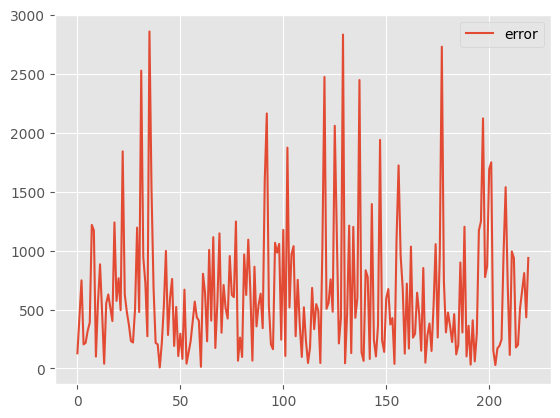

In [388]:
result.plot(y=['error'], grid=True)
result_03 = result

Проведём эксперимент и теперь возьмём размер тестовой выборки 0,2. Уберём windspeed 

[[ 434.98788845 2087.18213207 -805.01333498 5919.80213428]]
season: 434.9878884450134
yr: 2087.1821320723393
weathersit: -805.0133349836888
atemp: 5919.80213427787
R^2= 0.7780957933805746
Mean Absolute Error: 655.5018801099968
Mean Squared Error: 762703.8180580656
Root Mean Squared Error: 873.329157911303
Средняя ошибка аппроксимации в % cnt    0.100496
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4937.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:05:29   Log-Likelihood:                         -6028.9
No. Observations:                 731   AIC:                                  1.207e+04
Df Residuals:

<Axes: >

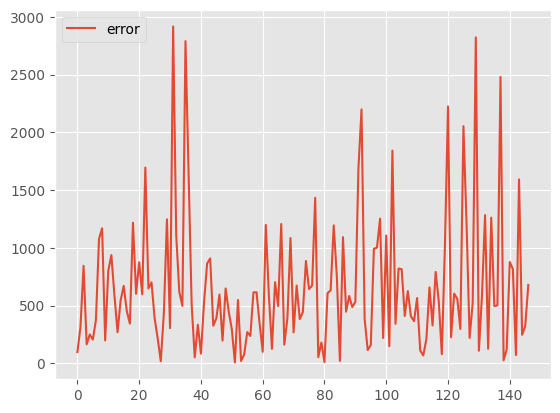

In [389]:
y = df[['cnt']]
X = df.drop(['cnt'], axis=1)
X = X.drop (['windspeed'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')
y_pred = regressor.predict(X_test)
df_2 = pd.DataFrame(y_pred) 
df_2
result = pd.concat([y_test.reset_index(), df_2], axis=1, join='outer')
result.columns =['index','фактическое','предсказанное' ]
r_squared = regressor.score (X, y)
print('R^2=',r_squared)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = metrics.mean_absolute_error(y_test, y_pred) / y_test.abs().sum()
print('Средняя ошибка аппроксимации в %', mape*100)
result['error'] = abs(result['предсказанное']-result['фактическое'])
result
model = sm. OLS (y, X). fit ()
print(model. summary ())
result.plot(y=['error'], grid=True)

In [390]:
result_02 = result
result_02

,index,фактическое,предсказанное,error
0,398,4151,4247.569293,96.569293
1,361,2302,1986.510732,315.489268
2,101,2034,2877.876724,843.876724
3,240,4634,4798.086892,164.086892
4,383,3292,3541.289540,249.289540
...,...,...,...,...
142,277,4826,4754.636372,71.363628
143,138,4575,2982.586185,1592.413815
144,215,4576,4329.495913,246.504087
145,27,1167,846.099168,320.900832


В среднем значения отклоняются от фактических на 10%, модель можно считать удачной и точной

Проведём следующий эксперимент и теперь возьмём размер тестовой выборки 0,1.

[[ 413.84953619 2073.96574771 -784.31143537 5977.68651135]]
season: 413.84953618794384
yr: 2073.9657477134333
weathersit: -784.3114353701449
atemp: 5977.686511345142
R^2= 0.778289722339724
Mean Absolute Error: 604.5337017251912
Mean Squared Error: 639903.829693203
Root Mean Squared Error: 799.939891300092
Средняя ошибка аппроксимации в % cnt    0.190185
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4937.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:05:30   Log-Likelihood:                         -6028.9
No. Observations:                 731   AIC:                                  1.207e+04
Df Residuals:

<Axes: >

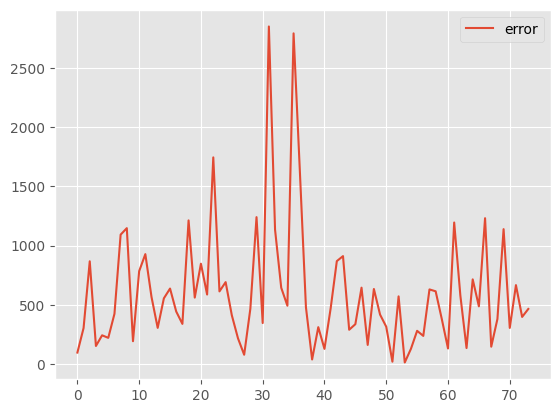

In [391]:
y = df[['cnt']]
X = df.drop(['cnt'], axis=1)
X = X.drop (['windspeed'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')
y_pred = regressor.predict(X_test)
df_2 = pd.DataFrame(y_pred) 
df_2
result = pd.concat([y_test.reset_index(), df_2], axis=1, join='outer')
result.columns =['index','фактическое','предсказанное' ]
r_squared = regressor.score (X, y)
print('R^2=',r_squared)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = metrics.mean_absolute_error(y_test, y_pred) / y_test.abs().sum()
print('Средняя ошибка аппроксимации в %', mape*100)
result['error'] = abs(result['предсказанное']-result['фактическое'])
model = sm. OLS (y, X). fit ()

#view model summary
print(model. summary ())
result.plot(y=['error'], grid=True)

In [392]:
result_01 = result
result

,index,фактическое,предсказанное,error
0,398,4151,4247.831497,96.831497
1,361,2302,1998.289141,303.710859
2,101,2034,2901.552684,867.552684
3,240,4634,4786.573747,152.573747
4,383,3292,3534.645675,242.645675
...,...,...,...,...
69,654,7534,6394.999612,1139.000388
70,646,5478,5172.894372,305.105628
71,187,4592,5258.290922,666.290922
72,479,5633,5235.162344,397.837656


Данная модель хуже, чем предыдущие. В среднем значения отклоняются от фактических на 20%

Проведём ещё один эксперимент. Возьмём тестовую выборку 0.4

[[ 436.02176576 2048.97032565 -836.60523047 6014.60515939]]
season: 436.0217657620038
yr: 2048.9703256518615
weathersit: -836.6052304659702
atemp: 6014.605159386936
R^2= 0.7775224223223965
Mean Absolute Error: 714.209701135902
Mean Squared Error: 916231.1895074132
Root Mean Squared Error: 957.1996602106653
Средняя ошибка аппроксимации в % cnt    0.05374
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4937.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:05:31   Log-Likelihood:                         -6028.9
No. Observations:                 731   AIC:                                  1.207e+04
Df Residuals:

,index,фактическое,предсказанное,error
0,398,4151,4239.947472,88.947472
1,361,2302,2014.316163,287.683837
2,101,2034,2895.324766,861.324766
3,240,4634,4859.053954,225.053954
4,383,3292,3522.356959,230.356959
...,...,...,...,...
288,698,5323,5482.309222,159.309222
289,606,7697,7075.079938,621.920062
290,639,6778,5930.291333,847.708667
291,231,5191,5105.881320,85.118680


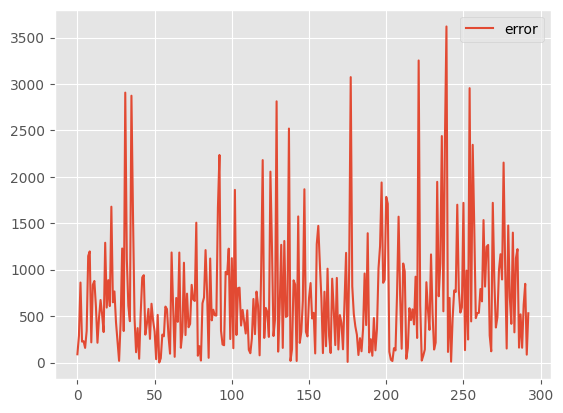

In [393]:
y = df[['cnt']]
X = df.drop(['cnt'], axis=1)
X = X.drop (['windspeed'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')
y_pred = regressor.predict(X_test)
df_2 = pd.DataFrame(y_pred) 
df_2
result = pd.concat([y_test.reset_index(), df_2], axis=1, join='outer')
result.columns =['index','фактическое','предсказанное' ]
r_squared = regressor.score (X, y)
print('R^2=',r_squared)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = metrics.mean_absolute_error(y_test, y_pred) / y_test.abs().sum()
print('Средняя ошибка аппроксимации в %', mape*100)
result['error'] = abs(result['предсказанное']-result['фактическое'])
result
model = sm. OLS (y, X). fit ()

#view model summary
print(model. summary ())
result.plot(y=['error'], grid=True)
result_04 = result
result_04

Данная модель лучше, чем предыдущие. В среднем значения отклоняются от фактических на 0,05%

Визуализируем графики ошибок

Text(0.5, 1.0, 'Сравнение ошибок')

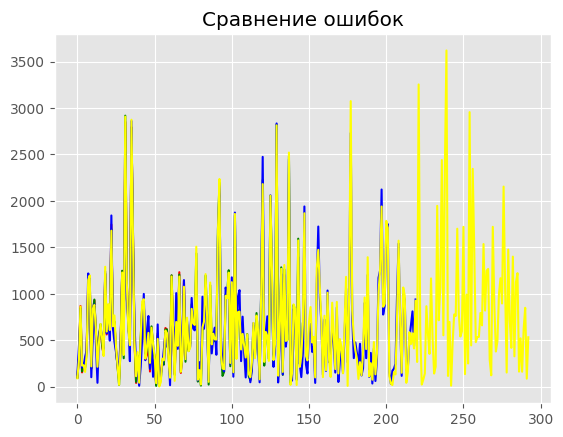

In [394]:
import pylab
#pylab.subplot (1, 2, 2)
pylab.plot (result_01['error'], label="error",color ="red")
pylab.plot (result_02['error'], label="error",color ="green")
pylab.plot (result_03['error'], label="error",color ="blue")
pylab.plot (result_04['error'], label="error",color ="yellow")
pylab.title ("Сравнение ошибок")